In [21]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

root = "/mnt/datadisk/pjluo_shared/minute_h5_data/20171102.h5"
df = pd.read_hdf(root)

In [22]:
df

,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver
InstrumentID,,,,,,,
SZ000001,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00
SZ000001,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00
SZ000001,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02
SZ000001,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03
SZ000001,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00
...,...,...,...,...,...,...,...
SH603999,14:56,9.18,9.18,9.19,9.18,12900.0,118451.00
SH603999,14:57,9.18,9.17,9.18,9.17,19600.0,179799.00
SH603999,14:58,9.17,9.17,9.18,9.17,27300.0,250443.00


In [31]:
df = df.reset_index()
df = df.set_index(['InstrumentID', 'EndTime'])
df

index   Open  Close   High    Low  LastVolume  \
InstrumentID EndTime                                                   
SZ000001     09:31         0  11.36  11.34  11.38  11.33    379300.0   
             09:32         1  11.34  11.34  11.34  11.33    239900.0   
             09:33         2  11.34  11.36  11.36  11.33    214494.0   
             09:34         3  11.36  11.34  11.34  11.33    156091.0   
             09:35         4  11.34  11.33  11.34  11.33    452600.0   
...                      ...    ...    ...    ...    ...         ...   
SH603999     14:56    774955   9.18   9.18   9.19   9.18     12900.0   
             14:57    774956   9.18   9.17   9.18   9.17     19600.0   
             14:58    774957   9.17   9.17   9.18   9.17     27300.0   
             14:59    774958   9.17   9.18   9.18   9.17     39500.0   
             15:00    774959   9.18   9.17   9.18   9.17     18500.0   

                      LastTurnOver  
InstrumentID EndTime                
SZ000001     09:31      4303682.00  
             09:32      2718841.00  
             09:33      2431434.02  
             09:34      1769884.03  
             09:35      5128897.00  
...                            ...  
SH603999     14:56       118451.00  
             14:57       179799.00  
             14:58       250443.00  
             14:59       362293.00  
             15:00       169719.00  

[774960 rows x 7 columns]

In [7]:
df_reset = df.reset_index()
df_multi = df_reset.set_index(['InstrumentID', 'EndTime'])
df_multi

Open  Close   High    Low  LastVolume  LastTurnOver
InstrumentID EndTime                                                      
SZ000001     09:31    11.36  11.34  11.38  11.33    379300.0    4303682.00
             09:32    11.34  11.34  11.34  11.33    239900.0    2718841.00
             09:33    11.34  11.36  11.36  11.33    214494.0    2431434.02
             09:34    11.36  11.34  11.34  11.33    156091.0    1769884.03
             09:35    11.34  11.33  11.34  11.33    452600.0    5128897.00
...                     ...    ...    ...    ...         ...           ...
SH603999     14:56     9.18   9.18   9.19   9.18     12900.0     118451.00
             14:57     9.18   9.17   9.18   9.17     19600.0     179799.00
             14:58     9.17   9.17   9.18   9.17     27300.0     250443.00
             14:59     9.17   9.18   9.18   9.17     39500.0     362293.00
             15:00     9.18   9.17   9.18   9.17     18500.0     169719.00

[774960 rows x 6 columns]

In [19]:
res = pd.DataFrame(df_multi['Open'])
# # res.pivot(index='EndTime', columns='InstrumentID', values='value')
# res
df_unstack = df_multi['Open'].unstack()
df_unstack

EndTime,09:31,09:32,09:33,09:34,09:35,09:36,09:37,09:38,09:39,09:40,...,14:51,14:52,14:53,14:54,14:55,14:56,14:57,14:58,14:59,15:00
InstrumentID,,,,,,,,,,,,,,,,,,,,,
SH600000,12.52,12.53,12.54,12.53,12.54,12.53,12.54,12.54,12.54,12.53,...,12.53,12.56,12.54,12.55,12.56,12.55,12.54,12.54,12.54,12.53
SH600004,14.20,14.18,14.19,14.19,14.20,14.20,14.23,14.27,14.30,14.29,...,14.12,14.14,14.13,14.12,14.13,14.12,14.12,14.13,14.12,14.12
SH600006,6.34,6.31,6.31,6.32,6.32,6.33,6.32,6.32,6.32,6.31,...,6.26,6.27,6.27,6.26,6.27,6.26,6.26,6.25,6.25,6.24
SH600007,18.15,18.15,18.15,18.16,18.15,18.10,18.09,18.04,17.99,17.98,...,18.24,18.25,18.20,18.19,18.20,18.24,18.24,18.23,18.22,18.19
SH600008,5.85,5.84,5.82,5.80,5.80,5.79,5.79,5.79,5.78,5.79,...,5.77,5.77,5.77,5.77,5.77,5.78,5.78,5.77,5.77,5.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SZ300710,55.09,55.09,55.09,55.09,55.09,55.09,55.09,55.09,55.09,55.09,...,55.09,55.09,55.09,55.09,55.09,55.09,55.09,55.09,55.09,55.09
SZ300711,13.22,13.22,13.22,13.22,13.22,13.22,13.22,13.22,13.22,13.22,...,13.22,13.22,13.22,13.22,13.22,13.22,13.22,13.22,13.22,13.22
SZ300712,20.59,20.59,20.59,20.59,20.59,20.59,20.59,20.59,20.59,20.59,...,20.59,20.59,20.59,20.59,20.59,20.59,20.59,20.59,20.59,20.59


ValueError: list.remove(x): x not in list

In [10]:
res = df_multi.xs('09:31', level='EndTime')
res

,Open,Close,High,Low,LastVolume,LastTurnOver
InstrumentID,,,,,,
SZ000001,11.36,11.34,11.38,11.33,379300.0,4303682.0
SZ000002,29.30,29.21,29.40,29.20,738099.0,21622022.7
SZ000004,23.55,23.55,23.55,23.55,200.0,4710.0
SZ000005,4.70,4.68,4.70,4.67,18300.0,85655.0
SZ000008,9.17,9.22,9.22,9.17,170900.0,1572905.0
...,...,...,...,...,...,...
SH603993,7.23,7.26,7.27,7.23,1577100.0,11441360.0
SH603996,18.60,18.47,18.60,18.45,76500.0,1416600.0
SH603997,13.28,13.28,13.28,13.25,15700.0,208537.0


In [3]:
df_safe_sc = df.loc['SZ000001']

In [4]:
df_safe_sc

,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver
InstrumentID,,,,,,,
SZ000001,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00
SZ000001,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00
SZ000001,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02
SZ000001,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03
SZ000001,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00
...,...,...,...,...,...,...,...
SZ000001,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80
SZ000001,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04
SZ000001,14:58,11.53,11.53,11.53,11.53,0.0,0.00


In [14]:
close = df_safe_sc['Close']
close_pct = close.pct_change()
close_pct

EndTime
09:31         NaN
09:32    0.000000
09:33    0.001764
09:34   -0.001761
09:35   -0.000882
           ...   
14:56    0.000868
14:57    0.000000
14:58    0.000000
14:59    0.000000
15:00    0.000867
Name: Close, Length: 240, dtype: float64

In [15]:
close_pct.index = df_safe_sc['EndTime']
close_pct

EndTime
09:31         NaN
09:32    0.000000
09:33    0.001764
09:34   -0.001761
09:35   -0.000882
           ...   
14:56    0.000868
14:57    0.000000
14:58    0.000000
14:59    0.000000
15:00    0.000867
Name: Close, Length: 240, dtype: float64

In [16]:
close_pct.index = close.index
df_safe_sc['close_pct'] = close_pct

df_safe_sc

/tmp/ipykernel_2243431/2630529198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_sc['close_pct'] = close_pct


,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver,close_pct
EndTime,,,,,,,,
09:31,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00,NaN
09:32,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00,0.000000
09:33,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02,0.001764
09:34,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03,-0.001761
09:35,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00,-0.000882
...,...,...,...,...,...,...,...,...
14:56,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80,0.000868
14:57,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04,0.000000
14:58,14:58,11.53,11.53,11.53,11.53,0.0,0.00,0.000000


In [20]:
df_safe_sc['position'] = np.where(df_safe_sc['close_pct'] > 0, 1, np.where(df_safe_sc['close_pct'] < 0, -1, 0))
df_safe_sc

/tmp/ipykernel_2243431/1631348692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_sc['position'] = np.where(df_safe_sc['close_pct'] > 0, 1, np.where(df_safe_sc['close_pct'] < 0, -1, 0))


,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver,close_pct,position
EndTime,,,,,,,,,
09:31,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00,NaN,0
09:32,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00,0.000000,0
09:33,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02,0.001764,1
09:34,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03,-0.001761,-1
09:35,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00,-0.000882,-1
...,...,...,...,...,...,...,...,...,...
14:56,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80,0.000868,1
14:57,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04,0.000000,0
14:58,14:58,11.53,11.53,11.53,11.53,0.0,0.00,0.000000,0


In [21]:

df_safe_sc['value'] = 0
df_safe_sc.index = df_safe_sc['EndTime']

df_safe_sc

/tmp/ipykernel_2243431/2288121398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_sc['value'] = 0


,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver,close_pct,position,value
EndTime,,,,,,,,,,
09:31,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00,NaN,0,0
09:32,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00,0.000000,0,0
09:33,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02,0.001764,1,0
09:34,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03,-0.001761,-1,0
09:35,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00,-0.000882,-1,0
...,...,...,...,...,...,...,...,...,...,...
14:56,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80,0.000868,1,0
14:57,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04,0.000000,0,0
14:58,14:58,11.53,11.53,11.53,11.53,0.0,0.00,0.000000,0,0


In [22]:
del df_safe_sc['value']
df_safe_sc['return'] = df_safe_sc['position'].shift(1) * df_safe_sc['close_pct']
df_safe_sc

/tmp/ipykernel_2243431/3025800363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_sc['return'] = df_safe_sc['position'].shift(1) * df_safe_sc['close_pct']


,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver,close_pct,position,return
EndTime,,,,,,,,,,
09:31,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00,NaN,0,NaN
09:32,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00,0.000000,0,0.000000
09:33,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02,0.001764,1,0.000000
09:34,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03,-0.001761,-1,-0.001761
09:35,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00,-0.000882,-1,0.000882
...,...,...,...,...,...,...,...,...,...,...
14:56,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80,0.000868,1,0.000868
14:57,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04,0.000000,0,0.000000
14:58,14:58,11.53,11.53,11.53,11.53,0.0,0.00,0.000000,0,0.000000


In [23]:
df_safe_sc['value'] = pd.Series(index=df_safe_sc.index)
money = 1e+5
for i in range(1, len(df_safe_sc)):
    df_safe_sc['value'].iloc[i] = money * (1+np.sum(df_safe_sc['return'][:i]))
df_safe_sc

/tmp/ipykernel_2243431/4069802333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_sc['value'] = pd.Series(index=df_safe_sc.index)
/tmp/ipykernel_2243431/4069802333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_safe_sc['value'].iloc[i] = money * (1+np.sum(df_safe_sc['return'][:i]))
/tmp/ipykernel_2243431/4069802333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver,close_pct,position,return,value
EndTime,,,,,,,,,,,
09:31,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00,NaN,0,NaN,NaN
09:32,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00,0.000000,0,0.000000,100000.000000
09:33,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02,0.001764,1,0.000000,100000.000000
09:34,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03,-0.001761,-1,-0.001761,100000.000000
09:35,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00,-0.000882,-1,0.000882,99823.943662
...,...,...,...,...,...,...,...,...,...,...,...
14:56,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80,0.000868,1,0.000868,97714.983238
14:57,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04,0.000000,0,0.000000,97801.788794
14:58,14:58,11.53,11.53,11.53,11.53,0.0,0.00,0.000000,0,0.000000,97801.788794


In [24]:
df_safe_sc

,EndTime,Open,Close,High,Low,LastVolume,LastTurnOver,close_pct,position,return,value
EndTime,,,,,,,,,,,
09:31,09:31,11.36,11.34,11.38,11.33,379300.0,4303682.00,NaN,0,NaN,NaN
09:32,09:32,11.34,11.34,11.34,11.33,239900.0,2718841.00,0.000000,0,0.000000,100000.000000
09:33,09:33,11.34,11.36,11.36,11.33,214494.0,2431434.02,0.001764,1,0.000000,100000.000000
09:34,09:34,11.36,11.34,11.34,11.33,156091.0,1769884.03,-0.001761,-1,-0.001761,100000.000000
09:35,09:35,11.34,11.33,11.34,11.33,452600.0,5128897.00,-0.000882,-1,0.000882,99823.943662
...,...,...,...,...,...,...,...,...,...,...,...
14:56,14:56,11.52,11.53,11.53,11.51,531840.0,6126146.80,0.000868,1,0.000868,97714.983238
14:57,14:57,11.53,11.53,11.54,11.52,854168.0,9849570.04,0.000000,0,0.000000,97801.788794
14:58,14:58,11.53,11.53,11.53,11.53,0.0,0.00,0.000000,0,0.000000,97801.788794


<function matplotlib.pyplot.show(close=None, block=None)>

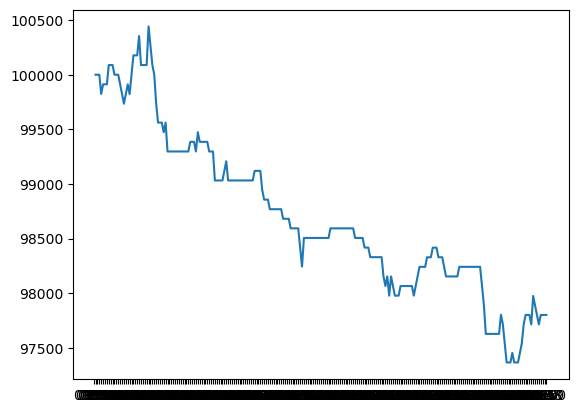

In [25]:
import matplotlib.pyplot as plt

plt.plot(df_safe_sc['EndTime'], df_safe_sc['value'])
plt.show

In [ ]:
ret = 0
value = []
p = list(df_safe_sc['Close'])
for i in range(len(df_safe_sc)):
    if i == len(df_safe_sc) - 1:
        if ret == 1:
            value.append(value[-1] + p[i])
        elif ret == -1:
            value.append(value[-1] - p[i])
    else:
        if df_safe_sc['position'].iloc[i] == 0:
            # 平仓信号
            if ret == 0:
                value.append(value[-1]) if len(value) > 0 else value.append(0)
            elif ret == 1:
                value.append(value[-1] + p[i])
            elif ret == -1:
                value.append(value[-1] - p[i])
            ret = 0
        elif df_safe_sc['position'].iloc[i] == 1:
            if ret == 0:
                value.append(value[-1] - p[i])
            if ret == 1:
                value.append(value[-1])
            if ret == -1:
                value.append(value[-1] + 2*p[i])
            ret = 1
        elif df_safe_sc['position'].iloc[i] == -1:
            if ret == 0:
                value.append(value[-1] - p[i])
            if ret == 1:
                value.append(value[-1] - 2*p[i])
            if ret == -1:
                value.append(value[-1])
            ret = -1



In [ ]:
value

[0,
 0,
 -11.36,
 -34.04,
 -34.04,
 -45.37,
 -56.69,
 -56.69,
 -67.99,
 -79.27,
 -56.69,
 -45.4,
 -56.7,
 -79.28,
 -56.68,
 -79.25999999999999,
 -79.25999999999999,
 -79.25999999999999,
 -56.69999999999999,
 -56.69999999999999,
 -56.69999999999999,
 -45.37999999999999,
 -56.68999999999999,
 -56.68999999999999,
 -34.04999999999999,
 -22.72999999999999,
 -22.72999999999999,
 -34.05999999999999,
 -34.05999999999999,
 -56.75999999999999,
 -34.019999999999996,
 -56.739999999999995,
 -33.959999999999994,
 -56.69999999999999,
 -68.07,
 -79.41,
 -56.709999999999994,
 -56.709999999999994,
 -79.36999999999999,
 -90.69999999999999,
 -102.04999999999998,
 -90.69999999999999,
 -102.05999999999999,
 -90.69999999999999,
 -102.04999999999998,
 -113.39999999999998,
 -113.39999999999998,
 -113.39999999999998,
 -113.39999999999998,
 -124.72999999999998,
 -124.72999999999998,
 -136.04999999999998,
 -147.39,
 -170.04999999999998,
 -170.04999999999998,
 -147.40999999999997,
 -136.08999999999997,
 -136.08999